#Titanic Survival Prediction

##Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score
import seaborn as sns

##Mounting Drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Reading the dataset

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Titanic/train.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/Titanic/test.csv')

In [6]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
dataset2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


##Data Exploration

###Searching the available columns

In [7]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
dataset2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

###Deleting the columns Name and Ticket

In [9]:

dataset = dataset.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
dataset2 = dataset2.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

###Re-arranging columns

In [10]:
columns_titles = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'Survived']
dataset=dataset.reindex(columns=columns_titles)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [12]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [13]:
dataset.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [14]:
print(len(dataset["Fare"].unique()))
print(len(dataset["Cabin"].unique()))
#print(len(dataset["Ticket"].unique()))

248
148


##Dataset Preprocessing

In [15]:
dataset["Cabin"].notnull().astype("int")

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: int64

In [16]:
dataset["Cabin"] = dataset["Cabin"].notnull().astype("int")
dataset2["Cabin"] = dataset2["Cabin"].notnull().astype("int")

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  889 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [18]:
dataset.Cabin.unique()

array([0, 1])

In [19]:
dataset['Age'].fillna(int(dataset['Age'].mean()), inplace=True)
dataset2['Age'].fillna(int(dataset2['Age'].mean()), inplace=True)
dataset2['Fare'].fillna(int(dataset2['Fare'].mean()), inplace=True)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  889 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [21]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    int64  
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Sex']= label_encoder.fit_transform(dataset['Sex'])
dataset['Embarked']= label_encoder.fit_transform(dataset['Embarked'])
dataset2['Sex']= label_encoder.fit_transform(dataset2['Sex'])
dataset2['Embarked']= label_encoder.fit_transform(dataset2['Embarked'])

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [24]:
dataset.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.560236,0.523008,0.381594,32.204208,0.228956,1.538721,0.383838
std,0.836071,0.477990,13.005010,1.102743,0.806057,49.693429,0.420397,0.794231,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000
50%,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,0.000000,2.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,2.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000,1.000000


In [25]:
dataset.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
Pclass,1.000000,0.131900,-0.334974,0.083081,0.018443,-0.549500,-0.725541,0.157112,-0.338481
Sex,0.131900,1.000000,0.082949,-0.114631,-0.245489,-0.182333,-0.140391,0.104057,-0.543351
Age,-0.334974,0.082949,1.000000,-0.232978,-0.176486,0.093706,0.236162,-0.018937,-0.067814
SibSp,0.083081,-0.114631,-0.232978,1.000000,0.414838,0.159651,-0.040460,0.066654,-0.035322
Parch,0.018443,-0.245489,-0.176486,0.414838,1.000000,0.216225,0.036987,0.038322,0.081629
Fare,-0.549500,-0.182333,0.093706,0.159651,0.216225,1.000000,0.482075,-0.221226,0.257307
Cabin,-0.725541,-0.140391,0.236162,-0.040460,0.036987,0.482075,1.000000,-0.154457,0.316912
Embarked,0.157112,0.104057,-0.018937,0.066654,0.038322,-0.221226,-0.154457,1.000000,-0.163517
Survived,-0.338481,-0.543351,-0.067814,-0.035322,0.081629,0.257307,0.316912,-0.163517,1.000000


In [26]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    int64  
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


##Data Visualization

<Axes: title={'center': 'Alive(1) vs Dead(0)'}, xlabel='Output class', ylabel='Count'>

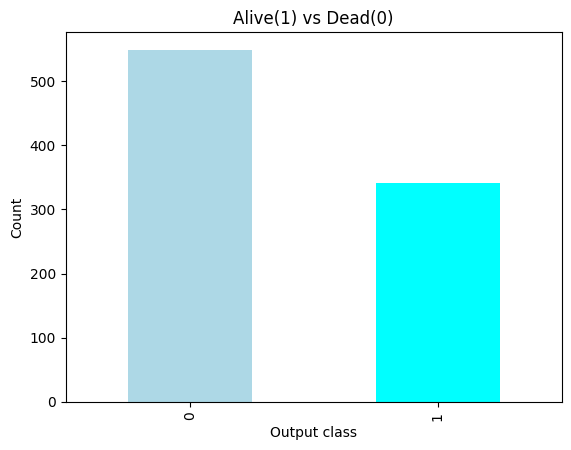

In [27]:
dataset.Survived.value_counts().plot.bar(color=['lightblue', 'cyan'],title="Alive(1) vs Dead(0)", xlabel="Output class", ylabel = "Count")

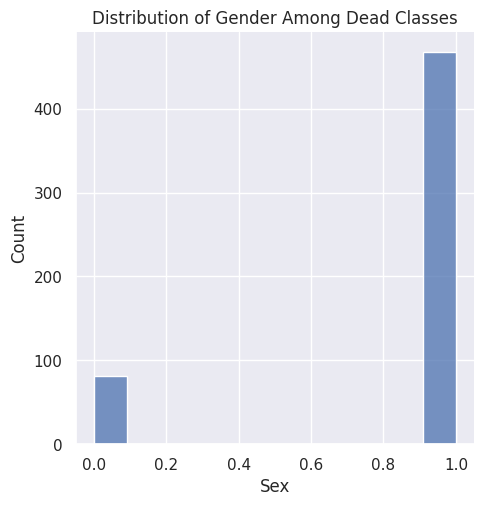

In [28]:
temp = dataset.query('Survived == 0')
sns.set_theme()
sns.displot(data=temp.Sex).set(title="Distribution of Gender Among Dead Classes", xlabel="Sex")

In [29]:
print(len(dataset.query('Survived == 0 and Sex == 0')))  #0 = Female
print(len(dataset.query('Survived == 0 and Sex == 1')))
print(len(dataset.query('Survived == 1 and Sex == 0')))
print(len(dataset.query('Survived == 1 and Sex == 1')))

81
468
233
109


##Feature Selection

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [31]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    int64  
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [32]:
X_train = dataset.iloc[:, :8].values
y_train = dataset.iloc[:, 8].values

dataset3 = pd.read_csv('/content/drive/MyDrive/Titanic/gender_submission.csv')

X_test = dataset2.iloc[:, :].values
y_test = dataset3.iloc[:, 1].values

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(891, 8)
(891,)
(418, 8)
(418,)


##Training


Accuracy score:  0.9521531100478469
Precision score:  0.9583333333333334


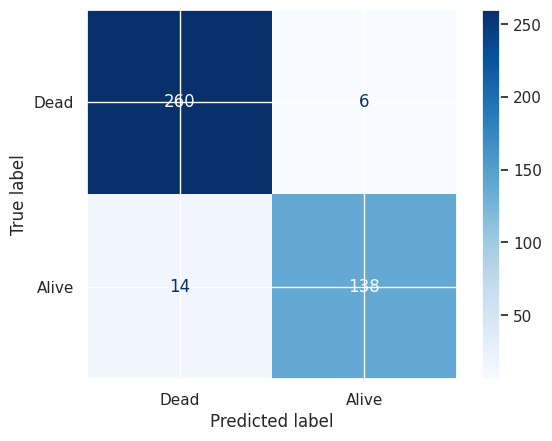

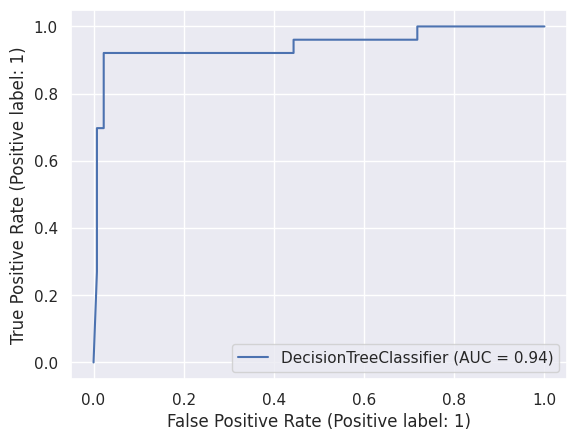

In [99]:
dt = DecisionTreeClassifier(min_samples_split=95, )
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Dead','Alive'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
#print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
#print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(dt, X_test, y_test)

Accuracy score:  0.9545454545454546
Precision score:  0.9463087248322147


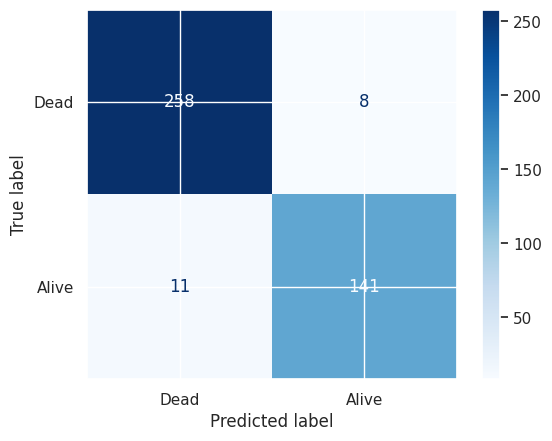

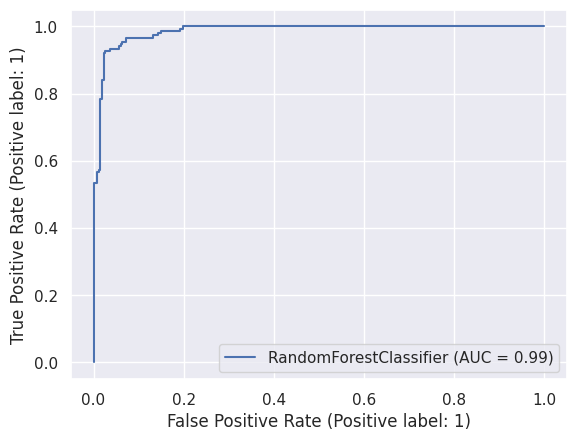

In [152]:
rf = RandomForestClassifier(min_samples_split=91, min_samples_leaf=2)
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Dead','Alive'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
#print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
#print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)